In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/My\ Drive/Affective_comp/SMILE_Training_Set.zip > /dev/null

In [ ]:
image = io.imread("/content/SMILE Training Set/123a.jpg")

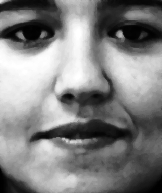

In [ ]:
cv2_imshow(image)
print('\n')

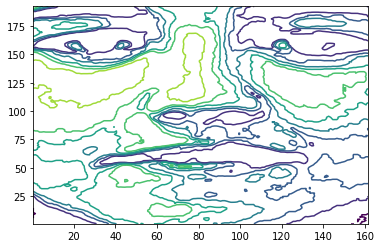

In [ ]:
plt.contour(image, origin = "image")

In [ ]:
ret, thresh = cv.threshold(image,130,255,0)
contours,im2  = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)


out=cv.drawContours(image, contours, -1 , (0, 255, 0), 3)


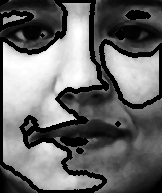

In [ ]:
cv2_imshow(out)

In [ ]:
import os
from pandas import read_csv
from skimage.feature import hog
from skimage import feature

# path to the folder containing images
input_folder_path = '/content/SMILE Training Set/'


X = []

annotations_path = '/content/SMILE Training Set/annotations.csv'
dataset = read_csv(annotations_path,header=None)
array = dataset.values
Y = array[:,1]
file_nam=array[:,0]
Y = np.where(Y=='neutral', 0, Y)
Y = np.where(Y=='happy', 1, Y)
Y = Y.astype('int')

for file_name in file_nam:
    # check if the file is an image (e.g. jpg, png, etc.)
    if file_name.lower().endswith('.jpg'):
        # load the image
        image_path = os.path.join(input_folder_path, file_name.lower())
        image = io.imread(image_path)
        
        laplacian=[]
        laplacian = cv.Laplacian(image, cv.CV_64F, ksize=3)
        #threshold_value = 35
        #binary=[]
        #binary = cv.threshold(laplacian, threshold_value, 255, cv.THRESH_BINARY)[1]
        fd = feature.hog(laplacian, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2))
       
        if len(X)==0:
          X=fd
        else:
          X = np.vstack((X, fd))


        


In [ ]:
X[3]

array([0.24277449, 0.24277449, 0.20011545, ..., 0.19669919, 0.13546176,
       0.11083269])

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier


kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=22)

scores = cross_validate(DecisionTreeClassifier(criterion='gini', max_depth=10), X, Y, cv=kfold, scoring=('f1', 'precision', 'recall', 'roc_auc'))

print('\tF1 Score: '+str(scores['test_f1'].mean()))
print('\tPrecision: '+str(scores['test_precision'].mean()))
print('\tRecall: '+str(scores['test_recall'].mean()))
print('\tROC AUC: '+str(scores['test_roc_auc'].mean()))
print()

	F1 Score: 0.7772701548592891
	Precision: 0.8214102564102564
	Recall: 0.75
	ROC AUC: 0.7861111111111112



In [ ]:
from sklearn.ensemble import RandomForestClassifier


scores = cross_validate(RandomForestClassifier(criterion='entropy', n_estimators=50, max_depth=None), X, Y, cv=kfold, scoring=('f1', 'precision', 'recall', 'roc_auc'))

print('\tF1 Score: '+str(scores['test_f1'].mean()))
print('\tPrecision: '+str(scores['test_precision'].mean()))
print('\tRecall: '+str(scores['test_recall'].mean()))
print('\tROC AUC: '+str(scores['test_roc_auc'].mean()))
print()

	F1 Score: 0.9073243455751197
	Precision: 0.9385831613347093
	Recall: 0.8833333333333334
	ROC AUC: 0.9782407407407406



In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(RandomForestClassifier(), {'n_estimators': [10, 30,50,100,120,200,360],'criterion' : ("gini", "entropy", "log_loss"),'max_depth':[10,30,50,None,100]})
grid.fit(X, Y)
grid.best_score_

0.95

In [ ]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 50, 'n_estimators': 200}

In [ ]:
model = grid.best_estimator_

In [ ]:
scores = cross_validate(RandomForestClassifier(criterion='log_loss', n_estimators=120, max_depth=100), X, Y, cv=kfold, scoring=('f1', 'precision', 'recall', 'roc_auc'))

print('\tF1 Score: '+str(scores['test_f1'].mean()))
print('\tPrecision: '+str(scores['test_precision'].mean()))
print('\tRecall: '+str(scores['test_recall'].mean()))
print('\tROC AUC: '+str(scores['test_roc_auc'].mean()))
print()

	F1 Score: 0.9174673266004534
	Precision: 0.933516081871345
	Recall: 0.9055555555555557
	ROC AUC: 0.9800925925925927



In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import LinearSVC

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=22)

scores = cross_validate(LinearSVC(), X, Y, cv=kfold, scoring=('f1', 'precision', 'recall', 'roc_auc'),return_estimator=True)

print('\tF1 Score: '+str(scores['test_f1'].mean()))
print('\tPrecision: '+str(scores['test_precision'].mean()))
print('\tRecall: '+str(scores['test_recall'].mean()))
print('\tROC AUC: '+str(scores['test_roc_auc'].mean()))
print()

	F1 Score: 0.9718782648194413
	Precision: 0.9730650154798761
	Recall: 0.9722222222222223
	ROC AUC: 0.9953703703703705



In [ ]:
scores

{'fit_time': array([1.534513  , 1.92041898, 3.75806093, 2.04136515, 2.24196553,
        1.65454888, 1.68043685, 1.5455873 , 1.57560205, 1.55199504]),
 'score_time': array([0.01125002, 0.01956582, 0.02157545, 0.01212406, 0.01170206,
        0.01045752, 0.01198697, 0.00973153, 0.01062822, 0.01023078]),
 'estimator': [LinearSVC(),
  LinearSVC(),
  LinearSVC(),
  LinearSVC(),
  LinearSVC(),
  LinearSVC(),
  LinearSVC(),
  LinearSVC(),
  LinearSVC(),
  LinearSVC()],
 'test_f1': array([1.        , 0.97142857, 1.        , 0.97297297, 0.97297297,
        0.97297297, 0.94117647, 0.97297297, 1.        , 0.91428571]),
 'test_precision': array([1.        , 1.        , 1.        , 0.94736842, 0.94736842,
        0.94736842, 1.        , 0.94736842, 1.        , 0.94117647]),
 'test_recall': array([1.        , 0.94444444, 1.        , 1.        , 1.        ,
        1.        , 0.88888889, 1.        , 1.        , 0.88888889]),
 'test_roc_auc': array([1.        , 0.99691358, 1.        , 0.98765432, 0.99

In [ ]:
scores['estimator'][0].get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [ ]:
Lsvc=LinearSVC()

Lsvc.fit(X,Y)

Lsvc.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(LinearSVC(), {'C': [0.5, 1.0, 1.5, 2.0],'loss':['squared_hinge','hinge'],'penalty':['l1','l2'],'multi_class': ['ovr','crammer_singer'],'dual':[True,False]})
grid.fit(X, Y)
grid.best_score_

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/svm/_classes.py", line 274, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py", line 1223, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, lo

0.9638888888888889

In [ ]:
grid.best_params_

{'C': 0.5,
 'loss': 'squared_hinge',
 'multi_class': 'crammer_singer',
 'penalty': 'l1'}

In [ ]:
from sklearn.ensemble import BaggingClassifier
model = grid.best_estimator_


bag_model = BaggingClassifier(
    base_estimator=model, 
    n_estimators=100, 
    max_samples=0.8, 
    oob_score=True,
    random_state=27
)

bag_model.fit(X, Y)
bag_model_oob_score = bag_model.oob_score_
bag_model_oob_score

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.9277777777777778

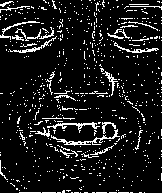

In [ ]:
img = cv.imread("/content/SMILE Training Set/123b.jpg", cv.IMREAD_GRAYSCALE)

# Apply the Laplacian filter with a kernel size of 3
laplacian = cv.Laplacian(img, cv.CV_64F, ksize=3)

# Apply a threshold to binarize the image
threshold_value = 35
binary = cv.threshold(laplacian, threshold_value, 255, cv.THRESH_BINARY)[1]

# Display the binary image
cv2_imshow(binary)
cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
import zipfile

# name of the output ZIP file
output_zip_path = '/content/output_images.zip'

# compress the output_images folder into a ZIP archive
with zipfile.ZipFile(output_zip_path, 'w', zipfile.ZIP_DEFLATED) as zip:
    for root, dirs, files in os.walk('/content/output_images'):
        for file in files:
            zip.write(os.path.join(root, file))

# download the ZIP archive
from google.colab import files
files.download(output_zip_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os

# path to the folder containing images
input_folder_path = '/content/SMILE Training Set/'

# create a new folder for the output images
output_folder_path = '/content/output_images/'
if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)

# loop over all the files in the folder
for file_name in os.listdir(input_folder_path):
    # check if the file is an image (e.g. jpg, png, etc.)
    if file_name.endswith('.jpg'):
        # load the image
        image_path = os.path.join(input_folder_path, file_name)
        image = io.imread(image_path)

        # apply the contours
        ret, thresh = cv.threshold(image, 130, 255, 0)
        contours,im2 = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
        out = cv.drawContours(image, contours, -1, (0, 255, 0), 3)

        # save the output in the new folder with the same name as the original image
        out_path = os.path.join(output_folder_path, file_name)
        cv.imwrite(out_path, out)